In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# Load datasets
customers = pd.read_csv("/content/drive/MyDrive/Customers.csv")
products = pd.read_csv("/content/drive/MyDrive/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Transactions.csv")

In [18]:
# Merge datasets
merged_df = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Data Cleaning
# Check for missing values
print("Missing Values:\n", merged_df.isnull().sum())

# Drop duplicates
merged_df.drop_duplicates(inplace=True)

# Convert date columns to datetime format
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'])

# EDA Visualizations
sns.set(style="whitegrid")

Missing Values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


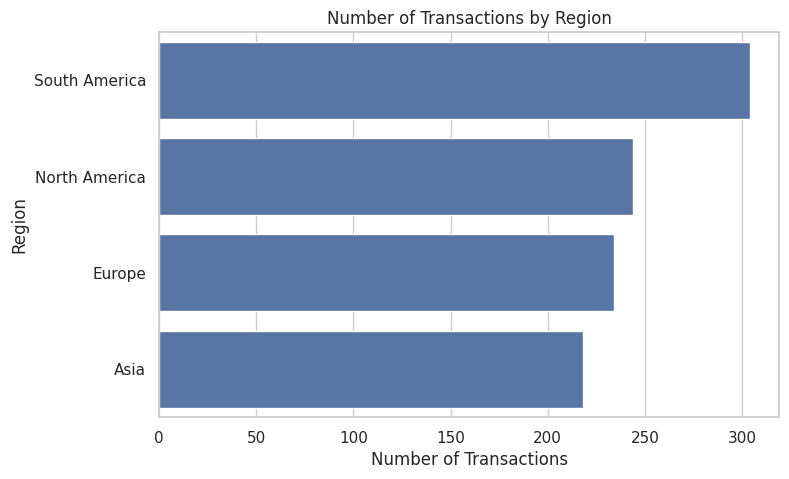

In [19]:
# 1. Transactions by Region
region_data = merged_df.groupby('Region')['TransactionID'].count().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=region_data.values, y=region_data.index, hue=None)
plt.title("Number of Transactions by Region")
plt.xlabel("Number of Transactions")
plt.ylabel("Region")

plt.show()


**1.Regional Transactions:**
South America has the highest number of transactions, suggesting a stronger market presence there. This region could benefit from enhanced marketing strategies to retain the lead.

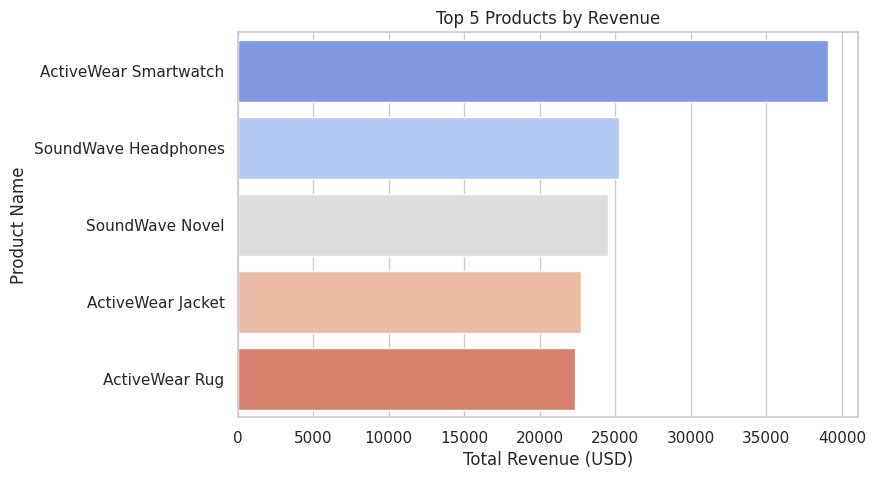

In [20]:
# 2. Top 5 Products by Revenue
top_products = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette="coolwarm", dodge=False, legend=False)
plt.title("Top 5 Products by Revenue")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Product Name")
plt.show()


**2.Top Products by Revenue:**
Products like the "ActiveWear Smartwatch" and "SoundWave Headphones" contribute significantly to total sales. These items should be prioritized in promotional campaigns.


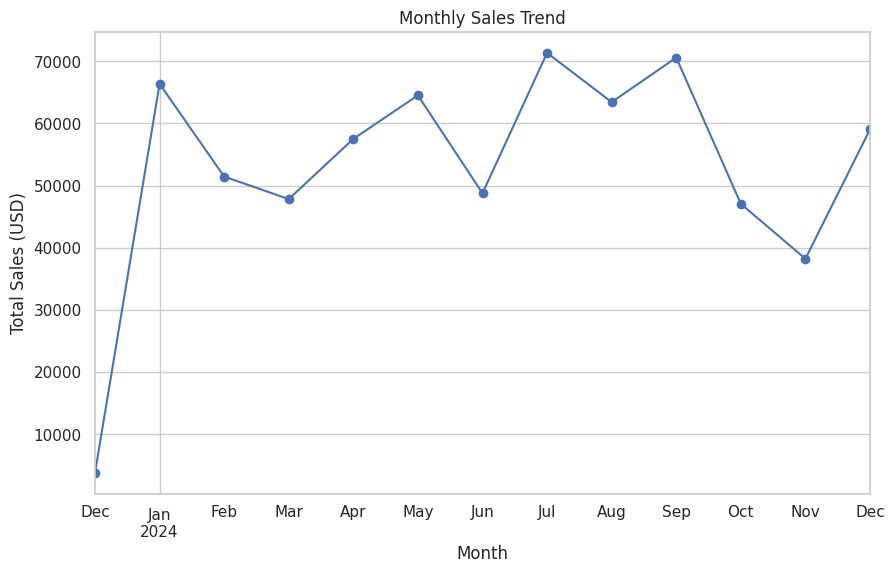

In [21]:
# 3. Monthly Sales Trend
merged_df['Month'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_sales = merged_df.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', color='b')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.grid(True)
plt.show()

**3.Sales Seasonality:**
Monthly sales peaked in July 2024, with a declining trend toward the year-end. This indicates a need for strategies to boost year-end sales, such as holiday discounts.

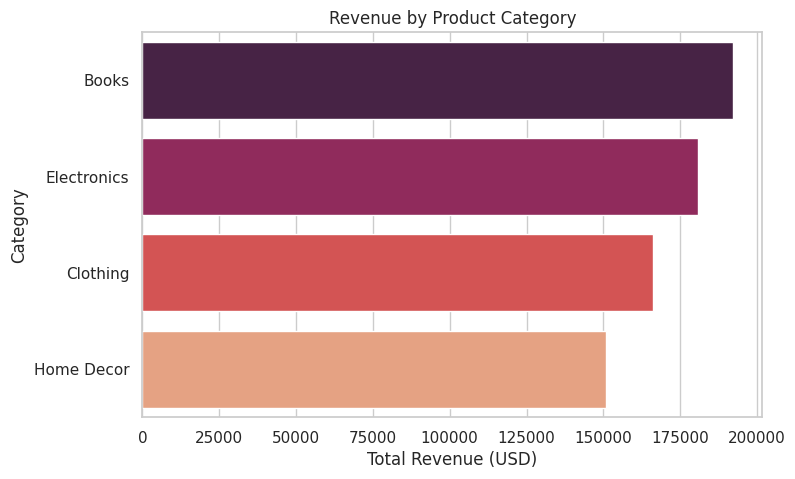

In [22]:
# 4. Revenue by Category
category_sales = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.values, y=category_sales.index, hue=category_sales.index, palette="rocket", dodge=False, legend=False)
plt.title("Revenue by Product Category")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Category")
plt.show()


**4.Category Insights:**
Books generate the highest revenue, followed by Electronics. Diversifying the inventory and marketing around these categories could maximize profitability.

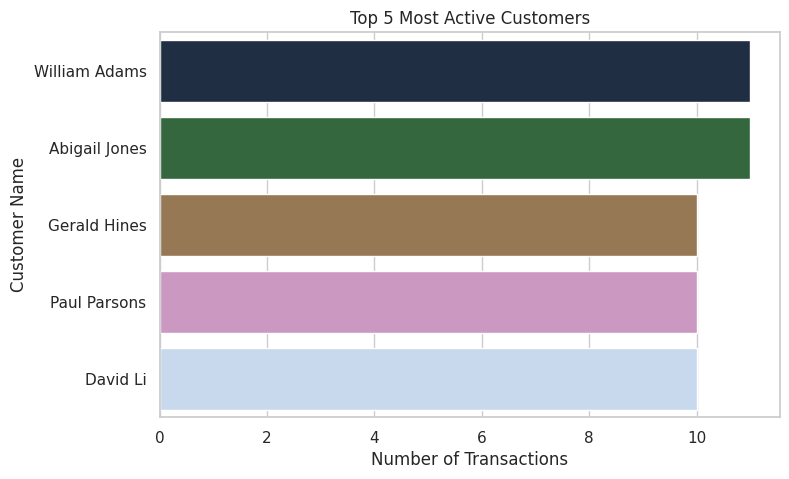

In [23]:

# 5. Most Active Customers
active_customers = merged_df.groupby('CustomerName')['TransactionID'].count().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=active_customers.values, y=active_customers.index, hue=active_customers.index, palette="cubehelix", dodge=False, legend=False)
plt.title("Top 5 Most Active Customers")
plt.xlabel("Number of Transactions")
plt.ylabel("Customer Name")
plt.show()


**5.Customer Loyalty:**
The most active customers include William Adams and Abigail Jones, indicating strong loyalty. Offering loyalty rewards or premium memberships to such customers could further drive engagement.

**Conclusion**
The analysis of the eCommerce Transactions dataset revealed actionable insights for business growth:

1.Electronics and Books dominate sales, with products like "ActiveWear Smartwatch" leading revenue generation.

2.South America is the strongest performing region, while untapped regions show growth potential with targeted strategies.

3.Loyal, high-value customers can be leveraged through loyalty programs to increase retention and revenue.

4.Seasonal trends highlight a mid-year sales peak and year-end decline, presenting opportunities for strategic holiday promotions.


5.Affordable products (<$50) drive higher sales volumes, suggesting a focus on budget-friendly offerings can further boost profitability.

These insights can drive informed decision-making to enhance sales, customer engagement, and market reach.